### defaultのまま実行

In [1]:
from brew_features import *               # brew_features.pyをimport
bf = brewFeatures()             # インスタンス初期化
bf.set_dataReader(dataReader()) # dataReaderを初期化してセット

Loading BokehJS ...

In [2]:
app = bf.make_app()                       # アプリケーション初期化
app.run_server(port=8050,debug=True)      # サーバー実行

Dash app running on http://127.0.0.1:8050/


### dataReader
現在の実装は、アイダのデータをcsvから読み込む。  
将来的にELSをデータソースとするものに置き換え。  
ad hocなCSV読み込みは、都度(現在の)dataReaderをoverrideする。

In [2]:
dr = dataReader()

In [3]:
flist = dr.get_shot_list()
# flist

In [4]:
dr.get_shot(10)

PosixPath('/Users/hao/data/ADDQ/20211004ブレークスルー/2110040014_A0000.CSV')

In [5]:
dr.read_logger(flist[10])

,time,右垂直,左垂直,加速度左右_X_左+500G,加速度上下_Y_下+500G,加速度前後_Z_前+500G,M30ボルスタ右奥,M20前左,M20前右,M20後左,M20後右,スライド＿金型隙間,プレス荷重,スライド変位左,スライド変位右,プレス荷重shift,dF/dt,F*dF/dt
0,0.00000,-0.812500,-2.640625,-0.108025,-0.121200,-0.079931,-5.896688,-26.208190,-0.633475,9.606306,-13.312160,0.000312,-0.171875,10.06141,10.05797,-0.343750,NaN,NaN
1,0.00005,-0.718750,-2.593750,-0.085675,-0.068175,-0.133219,-57.394430,-3.812100,2.375531,19.701070,-2.726587,0.001562,0.000000,10.06141,10.05797,-0.275000,0.068750,-0.018906
2,0.00010,-0.578125,-2.437500,-0.141550,-0.185587,-0.072319,-34.200790,-1.111863,0.633475,9.606306,5.613562,0.001249,-0.068750,10.06141,10.05797,-0.412500,-0.137500,0.056719
3,0.00015,-1.250000,-2.953125,-0.074500,-0.246188,-0.019031,27.910990,-15.407240,-5.067800,-8.466575,-5.613562,0.000937,-0.034375,10.06141,10.05797,-0.446875,-0.034375,0.015361
4,0.00020,-1.875000,-3.671875,-0.026075,-0.321937,-0.034256,43.242380,-14.454210,-6.651487,1.465369,-10.104410,0.000625,-0.034375,10.06141,10.05797,-0.275000,0.171875,-0.047266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0.26315,-2.500000,-2.125000,-0.186250,-0.446925,0.011419,12.972710,2.223725,-4.909431,-11.722950,16.199140,0.000625,-0.378125,10.06141,10.05797,NaN,NaN,NaN
5264,0.26320,-2.843750,-2.828125,-0.078225,-0.374962,0.087544,29.483440,-1.270700,-11.719290,-11.234490,20.850380,0.000312,-0.343750,10.06141,10.05797,NaN,NaN,NaN
5265,0.26325,-3.000000,-2.765625,-0.130375,-0.446925,0.076125,-1.572450,-2.223725,-18.212410,-12.374220,9.302475,0.001249,-0.275000,10.06141,10.05797,NaN,NaN,NaN
5266,0.26330,-2.828125,-2.437500,-0.186250,-0.465863,-0.011419,7.076025,-7.465362,-9.027019,-21.492070,1.764262,0.000312,-0.378125,10.06141,10.05797,NaN,NaN,NaN


### 表示項目の編集
波形グラフ表示部の形式(row x col)、どこにどの項目を配置するかは、  
  "項目名" => [row, col]
の形式のdict定義により編集可能とする。row, colの最大値により raw x colが定義される。  
dictを、set_dispcol()でセットすることで反映。

以下の例では、[1,1],[2,1],[1,2]が定義されているので、グラフ表示部は 2 x 2 の形式となる。

In [7]:
disp_col = {}
disp_col['プレス荷重shift'] = [1,1]
disp_col['右垂直'] = [1,1]
disp_col['スライド変位右'] = [2,1]
disp_col['スライド変位左'] = [2,1]
disp_col['加速度左右_X_左+500G'] = [1,2]
brewFeatures.set_dispcol(disp_col)

データ中に存在しない項目名を定義した場合、valueの第３項を評価し新たな項目が作られる。

In [11]:
disp_col = {}
disp_col['プレス荷重shift'] = [1,1,None]
disp_col['右垂直'] = [1,1,None]
disp_col['スライド変位右'] = [2,1,None]
disp_col['スライド変位左'] = [2,1,None]
disp_col['F*dFdt'] = [3,1,'df["プレス荷重shift"]*(df["プレス荷重shift"].diff() / df["time"].diff())']
brewFeatures.set_dispcol(disp_col)

### パッケージ化

In [8]:
from brew_features import *

Loading BokehJS ...

In [11]:
app = make_app()
app.run_server(
#    methode='inline',
#     host='0.0.0.0',
    port=8050,
    debug=True
)

Dash app running on http://127.0.0.1:8050/


In [28]:
df.columns

Index(['time', '右垂直', '左垂直', '加速度左右_X_左+500G', '加速度上下_Y_下+500G',
       '加速度前後_Z_前+500G', 'M30ボルスタ右奥', 'M20前左', 'M20前右', 'M20後左', 'M20後右',
       'スライド＿金型隙間', 'プレス荷重', 'スライド変位左', 'スライド変位右', 'プレス荷重shift', 'dF/dt',
       'F*dF/dt'],
      dtype='object')

In [56]:
make_subplots(rows=nrow, cols=ncol, shared_xaxes=True,vertical_spacing = 0.01,)
fig = go.FigureWidget(
    make_subplots(rows=3, cols=2, shared_xaxes=True,vertical_spacing = 0.01,)
)


In [57]:
disp_col

{'プレス荷重shift': 0, '右垂直': 0, 'スライド変位右': 1, 'スライド変位左': 1, '加速度左右_X_左+500G': 2}

In [58]:
fig.add_trace(go.Scatter(x=df.index,y=df['プレス荷重shift'],name='aa',legendgroup=1),row=1,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['スライド変位右'],name='bb',legendgroup=2),row=2,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['右垂直'],name='cc',legendgroup=1),row=1,col=1)
fig.update_layout(title_text="Multiple Subplots with Titles",                  showlegend=True                )
fig.update_layout(legend=dict(x=0.01,
                              y=0.99,
                              xanchor='left',
                              yanchor='top',
                              orientation='h',
                              ))

FigureWidget({
    'data': [{'legendgroup': '1',
              'name': 'aa',
              'type': 'scatter',
…

In [32]:
fig.data

(Scatter({
     'uid': '00a392c7-6c3b-4a4e-b7e4-671a4bde0763',
     'x': array([   0,    1,    2, ..., 2997, 2998, 2999]),
     'xaxis': 'x',
     'y': array([-0.34375 , -0.275   , -0.4125  , ..., -0.103125, -0.275   , -0.20625 ]),
     'yaxis': 'y'
 }),
 Scatter({
     'uid': 'fc72c1c6-5667-4b66-9f6e-eb603c2458df',
     'x': array([   0,    1,    2, ..., 2997, 2998, 2999]),
     'xaxis': 'x3',
     'y': array([10.05797            , 10.05797            , 10.05797            , ...,
                  0.45843770000000006,  0.45968770000000003,  0.46046899999999996]),
     'yaxis': 'y3'
 }),
 Scatter({
     'uid': 'ae84e4d8-8adc-4da3-a3d5-2fe0146642d3',
     'x': array([   0,    1,    2, ..., 2997, 2998, 2999]),
     'xaxis': 'x',
     'y': array([-0.8125  , -0.71875 , -0.578125, ..., -0.765625, -1.171875, -1.125   ]),
     'yaxis': 'y'
 }))

In [33]:
fig.layout

Layout({
    'template': '...',
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45], 'matches': 'x5', 'showticklabels': False},
    'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0], 'matches': 'x6', 'showticklabels': False},
    'xaxis3': {'anchor': 'y3', 'domain': [0.0, 0.45], 'matches': 'x5', 'showticklabels': False},
    'xaxis4': {'anchor': 'y4', 'domain': [0.55, 1.0], 'matches': 'x6', 'showticklabels': False},
    'xaxis5': {'anchor': 'y5', 'domain': [0.0, 0.45]},
    'xaxis6': {'anchor': 'y6', 'domain': [0.55, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.6733333333333333, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.6733333333333333, 1.0]},
    'yaxis3': {'anchor': 'x3', 'domain': [0.33666666666666667, 0.6633333333333333]},
    'yaxis4': {'anchor': 'x4', 'domain': [0.33666666666666667, 0.6633333333333333]},
    'yaxis5': {'anchor': 'x5', 'domain': [0.0, 0.32666666666666666]},
    'yaxis6': {'anchor': 'x6', 'domain': [0.0, 0.32666666666666666]}
})

In [16]:
for col in disp_col:
    fig.add_trace(go.Scatter(x=df.index, y=df[col], name=col), row=disp_col[col][0], col=disp_col[col][1])   
# plotly_vspan(fig,1000,2000,xref='x2',yref='y3')
fig.add_vrect(1000,1500,row=1, col=1,line_width=0, fillcolor="LightSalmon", opacity=0.2)
fig        

TypeError: 'int' object is not subscriptable

In [27]:
for d in fig.data:
    if d['name'] == 'スライド変位右':
        target_fig = [d['xaxis'],d['yaxis']]
        continue

In [75]:
target_fig

['x3', 'y3']

defaultでは、subplot間の軸共有は無し

In [79]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

x = list(range(10,20))
y = x
y1 = [10-i for i in x]
y2 = [abs(i-5) for i in x]
y3 = [abs(2*i- 5) for i in x]

fig = make_subplots(rows=2, cols=2, print_grid=True,)
fig.append_trace(go.Scatter({'x':x, 'y':y, 'name':'A1'},), 1, 1)
fig.append_trace(go.Scatter({'x':x, 'y':y1, 'name':'B2'},), 2, 2)
fig.append_trace(go.Scatter({'x':x, 'y':y2, 'name':'A2'},), 2, 1)
fig.append_trace(go.Scatter({'x':x, 'y':y3, 'name':'B1'},), 1, 2)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



shared_xaxesでX軸が共有されるが、対象は同じcolのsubplot同志、つまり縦に並んでるsubplotだけ。横は連動しない。

In [76]:
fig = make_subplots(rows=2, cols=2, shared_xaxes=True, print_grid=True,)
fig.append_trace(go.Scatter({'x':x, 'y':y, 'name':'A1'},), 1, 1)
fig.append_trace(go.Scatter({'x':x, 'y':y1, 'name':'B2'},), 2, 2)
fig.append_trace(go.Scatter({'x':x, 'y':y2, 'name':'A2'},), 2, 1)
fig.append_trace(go.Scatter({'x':x, 'y':y3, 'name':'B1'},), 1, 2)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



update_xaxes(matches='x')すると、全subplotが連動する。

In [78]:
fig.update_xaxes(matches='x')
fig.show()

### JupyterDash

In [22]:
# disp_col['プレス荷重shift']
yref[1]

'y'

### バッチ化

brewFeatures初期化

In [19]:
bf = brewFeatures()

locate_featuresメソッドを呼ぶと結果がもらえる。

In [20]:
result = bf.locate_feature(df,'vct_min','プレス荷重shift',9,'固定','',1000,'固定','',4000,'VCT','MIN')
result

{'feature_name': 'vct_min',
 'select_col': 'プレス荷重shift',
 'x_lim': [1000, 4000],
 'target_i': 1768,
 'target_v': -19.047566666666626}

"vct_min"が何を意味してるかは、brewFeaturesインスタンスが保持してる(gened_features)ので、名前だけ渡せば良い。  
callback_figure()の中でやってるのと同じ。  
逆に言うと、一連の処理は一連の処理として実行させる必要がある。これも当たり前だが。

In [41]:
bf.locate_feature(df,'breaking','プレス荷重shift',9,'特徴点','vct_min',-50,'特徴点','vct_min',0,'ACC','MIN')

{'feature_name': 'breaking',
 'select_col': 'プレス荷重shift',
 'x_lim': [1718, 1768],
 'target_i': 1755,
 'target_v': -0.4918592592592539}

従って、一連の処理として実行が必要なステップ数が、UI側の入力フォームとして必要ということ。

UIから(現状、Exportで)もらったjson文字列が、locate_feature()のパラメタになる。

In [6]:
import json
jsonstr='[{"feature_name": "vct_min", "select_col": "\u30d7\u30ec\u30b9\u8377\u91cdshift", "rolling_width": 9, "low_find_type": "\u56fa\u5b9a", "low_feature": "-", "low_lim": 1000, "up_find_type": "\u56fa\u5b9a", "up_feature": "-", "up_lim": 3000, "find_target": "VCT", "find_dir": "MIN"}, {"feature_name": "breaking", "select_col": "\u30d7\u30ec\u30b9\u8377\u91cdshift", "rolling_width": 1, "low_find_type": "\u7279\u5fb4\u70b9", "low_feature": "vct_min", "low_lim": "-50", "up_find_type": "\u7279\u5fb4\u70b9", "up_feature": "vct_min", "up_lim": 0, "find_target": "ACC", "find_dir": "MIN"}, {"feature_name": "", "select_col": "", "rolling_width": 1, "low_find_type": "\u56fa\u5b9a", "low_feature": "-", "low_lim": 0, "up_find_type": "\u56fa\u5b9a", "up_feature": "-", "up_lim": 0, "find_target": "DPT", "find_dir": "MAX"}, {"feature_name": "", "select_col": "", "rolling_width": 1, "low_find_type": "\u56fa\u5b9a", "low_feature": "-", "low_lim": 0, "up_find_type": "\u56fa\u5b9a", "up_feature": "-", "up_lim": 0, "find_target": "DPT", "find_dir": "MAX"}]'


In [7]:
jsondict = json.loads(jsonstr)
jsondict[0]

{'feature_name': 'vct_min',
 'select_col': 'プレス荷重shift',
 'rolling_width': 9,
 'low_find_type': '固定',
 'low_feature': '-',
 'low_lim': 1000,
 'up_find_type': '固定',
 'up_feature': '-',
 'up_lim': 3000,
 'find_target': 'VCT',
 'find_dir': 'MIN'}

これをshotで回せばOK。

In [17]:
int(os.path.basename(f)[7:10])

14

In [21]:
result = []
# for f in flist[10:15]:
from tqdm import tqdm_notebook as tqdm # (tqdm 5.0以前)
for f in tqdm(flist):    
    df = read_logger(f)[0][:5000]
    if not 'プレス荷重shift' in df.columns:
        continue
    for pdict in jsondict:
        r = bf.locate_feature(df,pdict['feature_name'],pdict['select_col'],pdict['rolling_width'],pdict['low_find_type'],pdict['low_feature'],pdict['low_lim'],
                                       pdict['up_find_type'],pdict['up_feature'],pdict['up_lim'],pdict['find_target'],pdict['find_dir'])
        if not r['feature_name'] == '':
            result.append([int(os.path.basename(f)[7:10]),r['feature_name'],r['target_i'],r['target_v']])
    

プレス荷重　無し
プレス荷重　無し
プレス荷重　無し
プレス荷重　無し
プレス荷重　無し
プレス荷重　無し
プレス荷重　無し



In [22]:
result

[[2, 'vct_min', 2433, -9.87326666666661],
 [2, 'breaking', 2397, -1.1344000000000278],
 [3, 'vct_min', 1981, -7.37916666666672],
 [3, 'breaking', 1960, -1.0656000000000176],
 [4, 'vct_min', 1917, -3.9645888888888976],
 [4, 'breaking', 1911, -0.7906999999999869],
 [5, 'vct_min', 2203, -0.04965277777777778],
 [5, 'breaking', 2189, -0.48125],
 [7, 'vct_min', 2586, -13.70416666666668],
 [7, 'breaking', 2574, -1.4092999999999734],
 [9, 'vct_min', 2280, -15.067705555555534],
 [9, 'breaking', 2272, -2.1311999999999784],
 [10, 'vct_min', 2301, -15.407635555555558],
 [10, 'breaking', 2299, -2.8187999999999818],
 [11, 'vct_min', 2292, -18.07743333333329],
 [11, 'breaking', 2287, -2.715599999999995],
 [12, 'vct_min', 2573, -0.04201388888888888],
 [12, 'breaking', 2531, -0.515625],
 [13, 'vct_min', 1770, -21.58367777777775],
 [13, 'breaking', 1768, -2.88749999999996],
 [14, 'vct_min', 1768, -19.047566666666626],
 [14, 'breaking', 1763, -2.0626000000000317],
 [16, 'vct_min', 2242, -0.03437500000000

In [23]:
feature_df = pd.DataFrame(result, columns=['shot','feature_name','index','value'])
feature_df

,shot,feature_name,index,value
0,2,vct_min,2433,-9.873267
1,2,breaking,2397,-1.134400
2,3,vct_min,1981,-7.379167
3,3,breaking,1960,-1.065600
4,4,vct_min,1917,-3.964589
...,...,...,...,...
107,71,breaking,1796,-2.646800
108,72,vct_min,1826,-21.373617
109,72,breaking,1821,-3.403000
110,73,vct_min,1863,-26.602436


array([<AxesSubplot:xlabel='shot'>, <AxesSubplot:xlabel='shot'>,
       <AxesSubplot:xlabel='shot'>, <AxesSubplot:xlabel='shot'>],
      dtype=object)

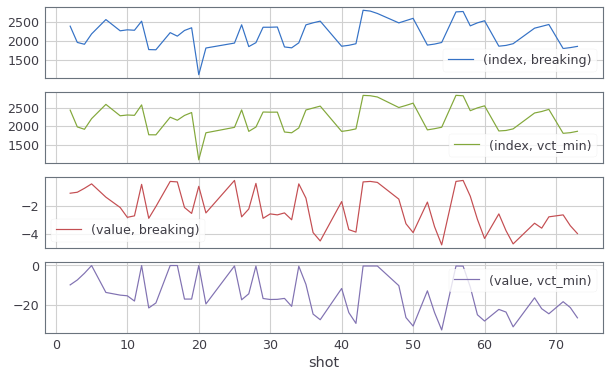

In [24]:
feature_df.set_index(['shot','feature_name']).unstack().plot(subplots=True,figsize=(10,6))

### 実験条件

In [25]:
shot =     [ 2, 3, 4, 5, 7, 9,10,11,12,13,14,16,17,18,19,20,21,25,26,27,28,29,30,31,32,33,34,35,36,37,
            40,41,42,43,44,45,48,49,50,52,53,54,56,57,58,59,60,62,63,64,67,68,69,71,72,73,75,76,77,78,79,80,81]
material = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,980,1180,1470,
            980,1180,1470,1180,1470,1470,980,1180,1470,980,1180,1470,1180,1470,980,1180,1470,980,1180,1470,980,1180,1470,980,1180,1470,
            1180,1180,1180,1180,1180,1470,1180]
spm =      [30,30,30,30,30,30,30,30,10,50,50,10,10,30,30,10,50,10,30,50,10,30,30,30,50,50,10,30,30,30,
            50,50,50,10,10,10,30,30,30,50,50,50,10,10,30,30,30,50,50,50,30,30,30,50,50,50,50,50,50,50,50,50,50]

In [27]:
cond_df = pd.DataFrame({'file':flist,'shot':shot, 'material':material, 'spm':spm})
display(cond_df[:30])

,file,shot,material,spm
0,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,2,0,30
1,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,3,0,30
2,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,4,0,30
3,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,5,0,30
4,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,7,0,30
5,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,9,0,30
6,/Users/hao/data/ADDQ/20211004ブレークスルー/211004001...,10,0,30
7,/Users/hao/data/ADDQ/20211004ブレークスルー/211004001...,11,0,30
8,/Users/hao/data/ADDQ/20211004ブレークスルー/211004001...,12,0,10
9,/Users/hao/data/ADDQ/20211004ブレークスルー/211004001...,13,0,50


In [33]:
feature_df.set_index(['shot','feature_name']).unstack().head()

index            value           
feature_name breaking vct_min breaking    vct_min
shot                                             
2                2397    2433 -1.13440  -9.873267
3                1960    1981 -1.06560  -7.379167
4                1911    1917 -0.79070  -3.964589
5                2189    2203 -0.48125  -0.049653
7                2574    2586 -1.40930 -13.704167

In [29]:
cond_df

,file,shot,material,spm
0,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,2,0,30
1,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,3,0,30
2,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,4,0,30
3,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,5,0,30
4,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,7,0,30
...,...,...,...,...
58,/Users/hao/data/ADDQ/20211004ブレークスルー/211004007...,77,1180,50
59,/Users/hao/data/ADDQ/20211004ブレークスルー/211004007...,78,1180,50
60,/Users/hao/data/ADDQ/20211004ブレークスルー/211004007...,79,1180,50
61,/Users/hao/data/ADDQ/20211004ブレークスルー/211004008...,80,1470,50


In [37]:
pd.merge(cond_df,feature_df[['shot','feature_name','value']].set_index(['shot','feature_name']).unstack()['value'],on='shot').head()

,file,shot,material,spm,breaking,vct_min
0,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,2,0,30,-1.13440,-9.873267
1,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,3,0,30,-1.06560,-7.379167
2,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,4,0,30,-0.79070,-3.964589
3,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,5,0,30,-0.48125,-0.049653
4,/Users/hao/data/ADDQ/20211004ブレークスルー/211004000...,7,0,30,-1.40930,-13.704167


### 抽出特徴/条件

In [47]:
mdf = pd.merge(cond_df,feature_df[['shot','feature_name','value']].set_index(['shot','feature_name']).unstack()['value'],on='shot')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

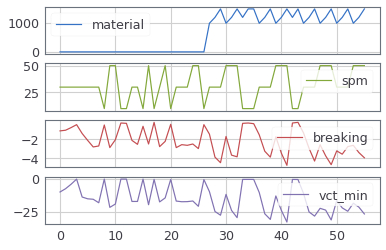

In [49]:
mdf[['material','spm','breaking','vct_min']].plot(subplots=True)

In [73]:
import pandas as pd
test_df = pd.DataFrame(
[{"a": 0.0, "b": 1.0, "c": "1"},
 {"a": 0.0, "b": 1.0, "c": "2"}]
)
num_colors = len(test_df["c"].unique())
current_palette = sns.color_palette()
palette = current_palette[:num_colors]
sns.lineplot(x="a", y="b",hue="c", data=test_df)

AttributeError: 'str' object has no attribute 'view'

In [70]:
palette

[(0.20784313725490197, 0.4470588235294118, 0.7764705882352941),
 (0.5137254901960784, 0.6588235294117647, 0.23137254901960785)]

In [68]:
mdf.spm

0     30
1     30
2     30
3     30
4     30
5     30
6     30
7     30
8     10
9     50
10    50
11    10
12    10
13    30
14    30
15    10
16    50
17    10
18    30
19    50
20    10
21    30
22    30
23    30
24    50
25    50
26    10
27    30
28    30
29    30
30    50
31    50
32    50
33    10
34    10
35    10
36    30
37    30
38    30
39    50
40    50
41    50
42    10
43    10
44    30
45    30
46    30
47    50
48    50
49    50
50    30
51    30
52    30
53    50
54    50
55    50
Name: spm, dtype: int64

In [63]:
mdfs = mdf.copy()
mdfs['material'] = mdfs['material'].astype(str)

In [77]:
!pip install seaborn -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 4.8 MB/s eta 0:00:0000:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
You should consider upgrading via the '/home/gifu-u/Workspace/gifu/bin/python3 -m pip install --upgrade pip' command.


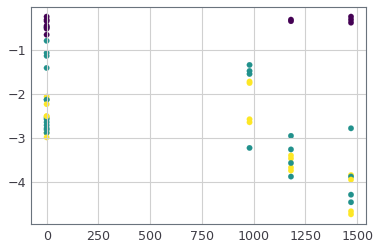

In [82]:
plt.scatter(mdf.material, mdf.breaking, c=mdf.spm)